Import Libraries

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Importing relevant libraries

# Data wrangling
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Data Visualization
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


# Data pre-processingg
from sklearn.preprocessing import StandardScaler

# Data splitting
from sklearn.model_selection import train_test_split

# Machine learning Models
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Evaluation metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc

from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

#Heirachical clustering requirements
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

Load Dataset

In [ ]:
df = pd.read_csv("/content/student's dropout dataset.csv")

print("Shape of dataset:", df.shape)
print(df.head())

Shape of dataset: (4424, 35)
   Marital status  Application mode  Application order  Course  \
0               1                 8                  5       2   
1               1                 6                  1      11   
2               1                 1                  5       5   
3               1                 8                  2      15   
4               2                12                  1       3   

   Daytime/evening attendance  Previous qualification  Nacionality  \
0                           1                       1            1   
1                           1                       1            1   
2                           1                       1            1   
3                           1                       1            1   
4                           0                       1            1   

   Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                      13                      10                    6  ..

In [ ]:
df.shape

(4424, 35)

In [ ]:
df.isnull().sum()

,0
Marital status,0
Application mode,0
Application order,0
Course,0
Daytime/evening attendance,0
Previous qualification,0
Nacionality,0
Mother's qualification,0
Father's qualification,0
Mother's occupation,0


In [ ]:
# Correcting typographical error for nationality
df.rename(columns = {'Nacionality':'Nationality'}, inplace = True)
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nationality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

# **Exploratory Data Analysis**

The majority of categorical variables in the downloaded dataset have already been converted to numerical format. However, for the purpose of exploratory data analysis (EDA), we will revert certain columns to their original categorical form.

In [ ]:
df_copy=df.copy()

**Target  Feature**

First we explore the values in the target column

In [ ]:
df['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

From the target column we can infer the following:

Dropout: The student dropped out

Graduate: The student graduated

Enrolled: The student is currently enrolled

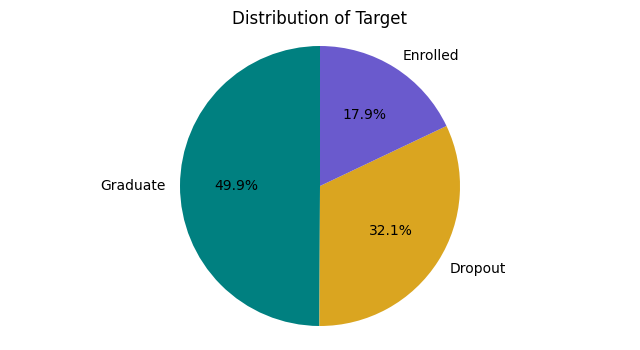

In [ ]:
# Get the data from your DataFrame
counts = df_copy['Target'].value_counts()
sizes = counts.values
labels = counts.index.to_list()

# Define the colors (similar to your original request)
colors = ['teal', 'goldenrod', 'slateblue']

# Create the basic pie chart
plt.figure(figsize=(8, 4)) # Set the size to be close to the original 800x400 aspect ratio

plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%',startangle=90)

# Add a title
plt.title('Distribution of Target')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Display the plot
plt.show()

Observation

The graph shows that majority of the students are Graduates (49%)
There are also more Dropouts (32.1%) than those currently Enrolled (17%)

Age distribution of students

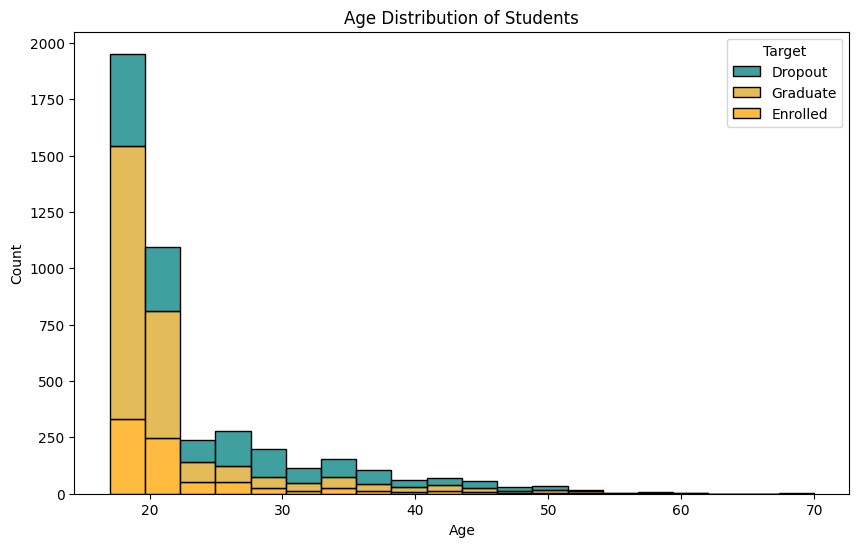

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df.copy(),x='Age at enrollment',hue='Target',multiple='stack',bins=20,palette=['teal', 'goldenrod','orange'])
plt.title('Age Distribution of Students')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [ ]:
# Change gender from numerical to catgorical
df_copy['Gender'] = df_copy['Gender'].map({1:'Male', 0:'Female'})

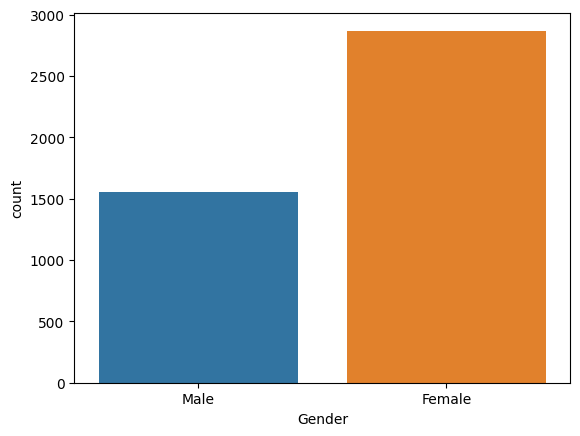

In [ ]:
sns.countplot(data=df_copy,x='Gender',hue='Gender' )
plt.show()

In [ ]:
df_copy['Course'] = df_copy['Course'].map({
    1: 'B.Tech. Biofuel Technology',
    2: 'B.Sc. Animation & Multimedia Design',
    3: 'B.A. Social Work (Evening Batch)',
    4: 'B.Sc. Agriculture (Agronomy)',
    5: 'B.Des. Communication Design',
    6: 'B.Sc. Veterinary Sciences',
    7: 'B.Tech. Computer Science & Engineering',
    8: 'B.Sc. Equine Science',
    9: 'BBA (Management)',
    10: 'B.A. Social Work',
    11: 'BBA/B.Sc. Hospitality & Tourism',
    12: 'B.Sc. Nursing',
    13: 'BDS/B.Sc. Dental Hygiene',
    14: 'BBA Advertising & Marketing',
    15: 'B.A. Journalism & Mass Communication',
    16: 'B.Ed. (Bachelor of Education)',
    17: 'BBA (Management - Evening Batch)'
})

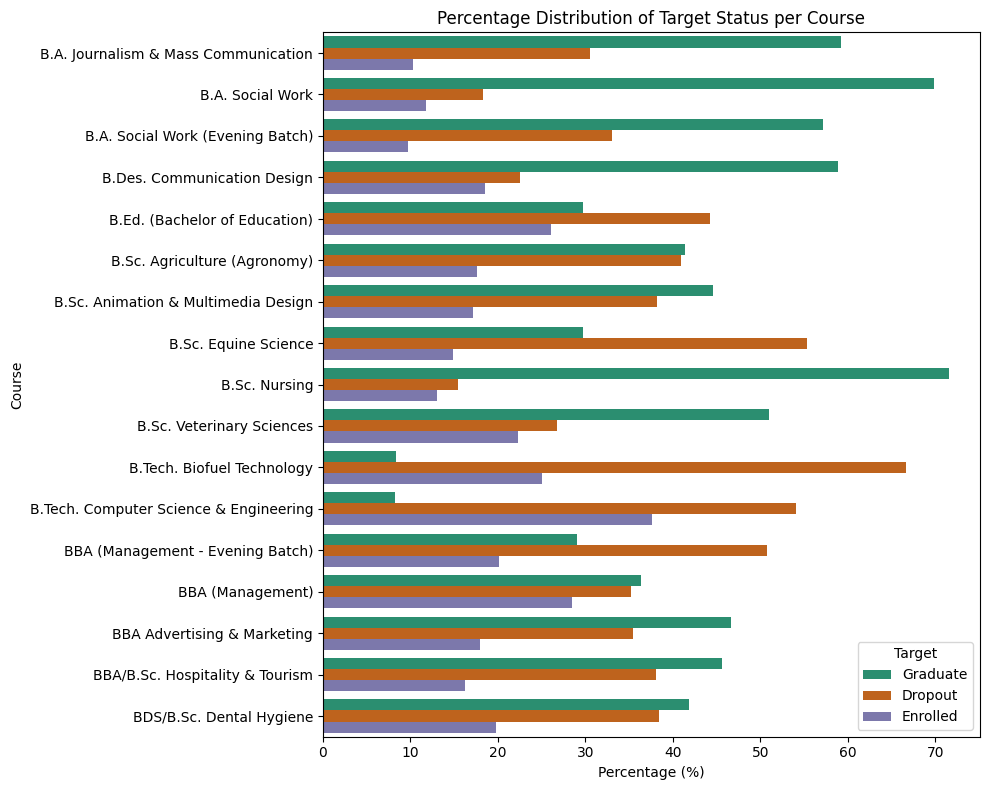

In [ ]:
course_target_counts = df_copy.groupby('Course')['Target'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()

# 2. Set up the plot
plt.figure(figsize=(10,8))
sns.barplot(data=course_target_counts,x='Percentage',y='Course',
    hue='Target',
    palette='Dark2'
)

# 3. Customize the plot
plt.title('Percentage Distribution of Target Status per Course')
plt.xlabel('Percentage (%)')
plt.ylabel('Course')

# 4. Display the plot
plt.tight_layout()
plt.show()

Majority of the students are enrolled in Nursing and it also had the lowest droput rate of about 15.4%.

The course that had the highest dropout rate was B.Tech. Biofuel Technology (66.7%) .

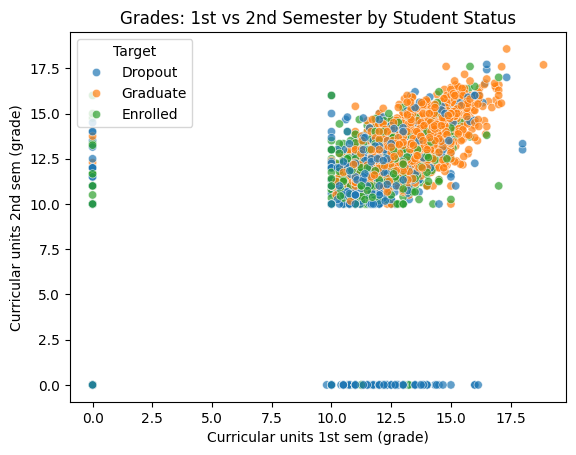

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example 1: Academic consistency across semesters
sns.scatterplot(
    data=df,
    x='Curricular units 1st sem (grade)',
    y='Curricular units 2nd sem (grade)',
    hue='Target',
    alpha=0.7
)
plt.title('Grades: 1st vs 2nd Semester by Student Status')
plt.show()


Label Encoding

In [ ]:
categorical_cols = ['Target']  # you can add more if needed
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print("\nEncoded categorical columns:", categorical_cols)


Encoded categorical columns: ['Target']


In [ ]:
# Suppose you want to convert classes 0 and 1 -> 0, and class 2 -> 1
df['Target'] = df['Target'].apply(lambda x: 1 if x == 2 else 0)

print(df['Target'].value_counts())


Target
0    2215
1    2209
Name: count, dtype: int64


In [ ]:
df.head(20)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1
5,2,12,1,17,0,12,1,22,27,10,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,1
6,1,1,1,12,1,1,1,13,28,8,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,1
7,1,9,4,11,1,1,1,22,27,10,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,0
8,1,1,3,10,1,1,15,1,1,10,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,1
9,1,1,1,10,1,1,1,1,14,5,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,0


In [ ]:
df['Avg_units_enrolled'] = (df['Curricular units 1st sem (enrolled)'] + df['Curricular units 2nd sem (enrolled)']) / 2
df['Avg_units_evaluations'] = (df['Curricular units 1st sem (evaluations)'] + df['Curricular units 2nd sem (evaluations)']) / 2
df['Avg_units_approved'] = (df['Curricular units 1st sem (approved)'] + df['Curricular units 2nd sem (approved)']) / 2
df['Avg_units_grade'] = (df['Curricular units 1st sem (grade)'] + df['Curricular units 2nd sem (grade)']) / 2

In [ ]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Avg_units_enrolled,Avg_units_evaluations,Avg_units_approved,Avg_units_grade
0,1,8,5,2,1,1,1,13,10,6,...,0.000000,0,10.8,1.4,1.74,0,0.0,0.0,0.0,0.000000
1,1,6,1,11,1,1,1,1,3,4,...,13.666667,0,13.9,-0.3,0.79,1,6.0,6.0,6.0,13.833333
2,1,1,5,5,1,1,1,22,27,10,...,0.000000,0,10.8,1.4,1.74,0,6.0,0.0,0.0,0.000000
3,1,8,2,15,1,1,1,23,27,6,...,12.400000,0,9.4,-0.8,-3.12,1,6.0,9.0,5.5,12.914286
4,2,12,1,3,0,1,1,22,28,10,...,13.000000,0,13.9,-0.3,0.79,1,6.0,7.5,5.5,12.666667


# **Scaling**

In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.drop("Target")
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print("\nScaled numerical features (excluding Target).")


Scaled numerical features (excluding Target).


In [ ]:
# ----- Outlier Handling (IQR-based removal) -----

continuous_cols = [
    'Age at enrollment',
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (grade)',
    'Avg_units_grade'
]

initial_rows = df.shape[0]

for col in continuous_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

print(f"\nOutliers removed using IQR method. Rows reduced from {initial_rows} to {df.shape[0]}.")



Outliers removed using IQR method. Rows reduced from 4424 to 3189.


In [ ]:
df.head(30)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Avg_units_enrolled,Avg_units_evaluations,Avg_units_approved,Avg_units_grade
1,-0.294829,-0.167406,-0.554068,0.254153,0.350082,-0.386404,-0.145586,-1.254495,-1.218380,-0.829997,...,0.659562,-0.199441,0.876222,-1.105222,0.347199,1,-0.109088,-0.569190,0.479467,0.705237
3,-0.294829,0.210069,0.207173,1.177663,0.350082,-0.386404,-0.145586,1.183116,0.954834,-0.329669,...,0.416450,-0.199441,-0.813253,-1.466871,-1.375511,1,-0.109088,0.213679,0.311680,0.514483
6,-0.294829,-1.111094,-0.554068,0.485030,0.350082,-0.386404,-0.145586,0.075111,1.045384,0.170659,...,0.789755,-0.199441,1.476924,1.137005,-1.789667,1,0.541911,0.083200,0.982828,0.702988
8,-0.294829,-1.111094,0.968414,0.023276,0.350082,-0.386404,7.862424,-1.254495,-1.399481,0.670987,...,0.750957,-0.199441,1.739731,-0.671242,-0.406211,1,-0.109088,-0.177756,0.479467,0.741682
9,-0.294829,-1.111094,-0.554068,0.023276,0.350082,-0.386404,-0.145586,-1.254495,-0.222324,-0.579833,...,0.627573,-0.199441,-1.000972,0.124386,1.545607,0,-0.109088,0.866069,-0.359468,0.418118
10,-0.294829,-1.111094,-0.554068,0.946785,0.350082,-0.386404,-0.145586,1.183116,-0.222324,-0.329669,...,0.761925,-0.199441,0.876222,-1.105222,0.347199,1,-0.109088,-0.438712,0.311680,0.587622
11,-0.294829,-1.111094,-0.554068,0.485030,0.350082,-0.386404,-0.145586,0.075111,1.045384,0.670987,...,0.572736,-0.199441,0.425695,1.787974,-0.749872,1,0.758911,-0.047278,0.815041,0.576750
13,-0.294829,1.908706,-0.554068,0.254153,0.350082,3.398360,-0.145586,-1.254495,-1.399481,-0.579833,...,0.147747,-0.199441,-1.000972,0.124386,1.545607,1,-0.109088,-0.177756,0.311680,0.072686
14,-0.294829,-1.111094,-0.554068,-0.900234,0.350082,-0.386404,-0.145586,1.183116,0.954834,-0.329669,...,0.339678,-0.199441,-0.287638,0.124386,0.765761,1,-0.543088,-0.569190,-0.023894,0.454440
16,-0.294829,0.398806,-0.554068,0.023276,0.350082,-0.386404,-0.145586,0.075111,1.045384,-0.329669,...,0.147747,-0.199441,-0.287638,0.124386,0.765761,0,-0.109088,0.996547,-1.030616,0.220940


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif


In [ ]:
X = df.drop("Target", axis=1)
y = df["Target"]


# **Feature Selection**

In [ ]:
selector = SelectKBest(score_func=f_classif, k=15)
X_new = selector.fit_transform(X, y)


In [ ]:
selected_features = X.columns[selector.get_support()]
print("Selected Features:")
print(selected_features)


Selected Features:
Index(['Application mode', 'Debtor', 'Tuition fees up to date', 'Gender',
       'Scholarship holder', 'Age at enrollment',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)', 'Avg_units_evaluations',
       'Avg_units_approved', 'Avg_units_grade'],
      dtype='object')


In [ ]:
selected_cols = [
        'Application mode', 'Displaced', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)'
  ]

X_selected = df[selected_cols]
y = df['Target']


# **Classification**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


=== Classification Report (After Feature Selection) ===
              precision    recall  f1-score   support

           0       0.81      0.68      0.74       246
           1       0.82      0.90      0.86       392

    accuracy                           0.82       638
   macro avg       0.82      0.79      0.80       638
weighted avg       0.82      0.82      0.81       638



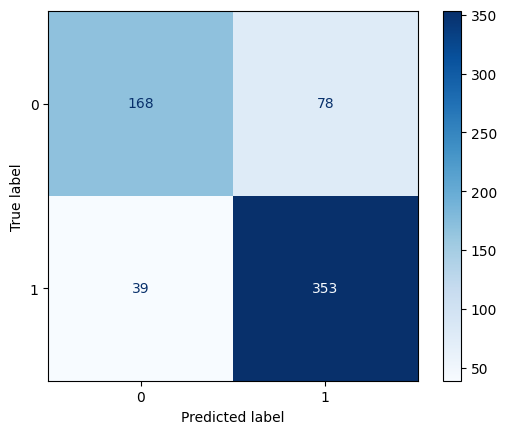

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print("=== Classification Report (After Feature Selection) ===")
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(cmap='Blues')
plt.show()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ***Without Feature***

Classification (Dropout Prediction) (without Feature selection)

Random Forest

In [ ]:
from sklearn.metrics import classification_report



clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("\n=== Classification Report (Dropout Prediction) ===")
print(classification_report(y_test, y_pred))


=== Classification Report (Dropout Prediction) ===
              precision    recall  f1-score   support

           0       0.84      0.69      0.76       246
           1       0.83      0.92      0.87       392

    accuracy                           0.83       638
   macro avg       0.83      0.80      0.81       638
weighted avg       0.83      0.83      0.83       638



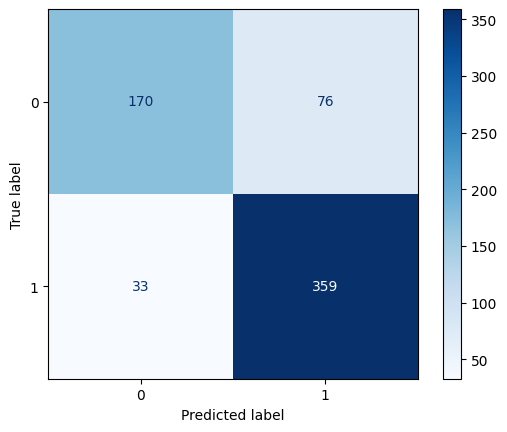

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(cmap='Blues')
plt.show()

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Logistic Regression

=== Logistic Regression Classification Report ===
              precision    recall  f1-score   support

           0       0.83      0.70      0.76       246
           1       0.83      0.91      0.87       392

    accuracy                           0.83       638
   macro avg       0.83      0.80      0.81       638
weighted avg       0.83      0.83      0.83       638

Accuracy: 0.829153605015674


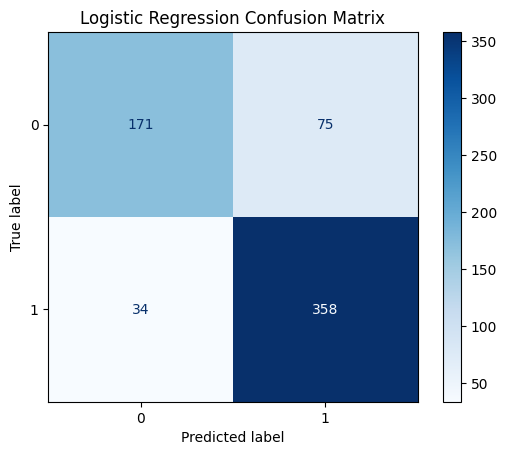

In [ ]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Evaluation
print("=== Logistic Regression Classification Report ===")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.show()


# **Clustering**

In [ ]:
# Create average academic performance features
df['Avg_units_enrolled'] = (df['Curricular units 1st sem (enrolled)'] + df['Curricular units 2nd sem (enrolled)']) / 2
df['Avg_units_evaluations'] = (df['Curricular units 1st sem (evaluations)'] + df['Curricular units 2nd sem (evaluations)']) / 2
df['Avg_units_approved'] = (df['Curricular units 1st sem (approved)'] + df['Curricular units 2nd sem (approved)']) / 2
df['Avg_units_grade'] = (df['Curricular units 1st sem (grade)'] + df['Curricular units 2nd sem (grade)']) / 2

In [ ]:
# Select relevant features for clustering
selected_cols = [
   'Application mode', 'Displaced', 'Debtor', 'Tuition fees up to date',
   'Gender', 'Scholarship holder', 'Age at enrollment',
   'Avg_units_enrolled', 'Avg_units_evaluations',
   'Avg_units_approved', 'Avg_units_grade'
]

In [ ]:
X_cluster = df[selected_cols]

In [ ]:
# Determine optimal number of clusters (Elbow Method)
inertia = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster)
    inertia.append(kmeans.inertia_)

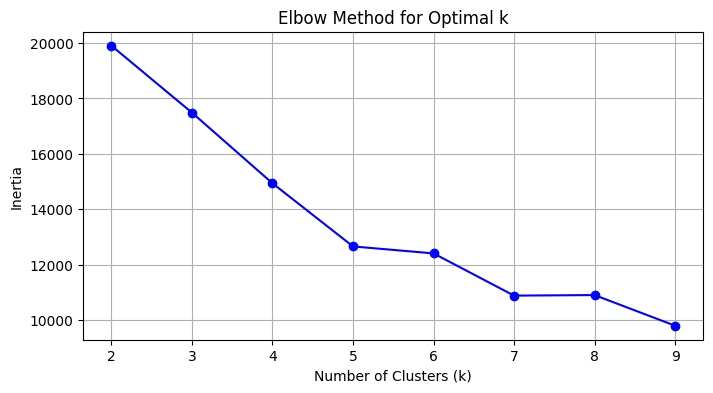

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# **K-means**

In [ ]:
df_copy1=df.copy()

In [ ]:
df_copy1.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Avg_units_enrolled,Avg_units_evaluations,Avg_units_approved,Avg_units_grade
1,-0.294829,-0.167406,-0.554068,0.254153,0.350082,-0.386404,-0.145586,-1.254495,-1.218380,-0.829997,...,0.659562,-0.199441,0.876222,-1.105222,0.347199,1,-0.107416,-0.536437,0.468477,0.676580
3,-0.294829,0.210069,0.207173,1.177663,0.350082,-0.386404,-0.145586,1.183116,0.954834,-0.329669,...,0.416450,-0.199441,-0.813253,-1.466871,-1.375511,1,-0.107416,0.209525,0.302608,0.496030
6,-0.294829,-1.111094,-0.554068,0.485030,0.350082,-0.386404,-0.145586,0.075111,1.045384,0.170659,...,0.789755,-0.199441,1.476924,1.137005,-1.789667,1,0.549641,0.075856,0.961824,0.669409
8,-0.294829,-1.111094,0.968414,0.023276,0.350082,-0.386404,7.862424,-1.254495,-1.399481,0.670987,...,0.750957,-0.199441,1.739731,-0.671242,-0.406211,1,-0.107416,-0.170462,0.468477,0.709373
9,-0.294829,-1.111094,-0.554068,0.023276,0.350082,-0.386404,-0.145586,-1.254495,-0.222324,-0.579833,...,0.627573,-0.199441,-1.000972,0.124386,1.545607,0,-0.107416,0.835830,-0.356609,0.392164


In [ ]:
#  Apply K-Means (choose optimal k from above, e.g., k=5)
k_optimal = 5
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
df_copy1['Cluster'] = kmeans.fit_predict(X_cluster)

In [ ]:
df_copy1.head(40)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Avg_units_enrolled,Avg_units_evaluations,Avg_units_approved,Avg_units_grade,Cluster
1,-0.294829,-0.167406,-0.554068,0.254153,0.350082,-0.386404,-0.145586,-1.254495,-1.218380,-0.829997,...,-0.199441,0.876222,-1.105222,0.347199,1,-0.107416,-0.536437,0.468477,0.676580,1
3,-0.294829,0.210069,0.207173,1.177663,0.350082,-0.386404,-0.145586,1.183116,0.954834,-0.329669,...,-0.199441,-0.813253,-1.466871,-1.375511,1,-0.107416,0.209525,0.302608,0.496030,1
6,-0.294829,-1.111094,-0.554068,0.485030,0.350082,-0.386404,-0.145586,0.075111,1.045384,0.170659,...,-0.199441,1.476924,1.137005,-1.789667,1,0.549641,0.075856,0.961824,0.669409,0
8,-0.294829,-1.111094,0.968414,0.023276,0.350082,-0.386404,7.862424,-1.254495,-1.399481,0.670987,...,-0.199441,1.739731,-0.671242,-0.406211,1,-0.107416,-0.170462,0.468477,0.709373,0
9,-0.294829,-1.111094,-0.554068,0.023276,0.350082,-0.386404,-0.145586,-1.254495,-0.222324,-0.579833,...,-0.199441,-1.000972,0.124386,1.545607,0,-0.107416,0.835830,-0.356609,0.392164,4
10,-0.294829,-1.111094,-0.554068,0.946785,0.350082,-0.386404,-0.145586,1.183116,-0.222324,-0.329669,...,-0.199441,0.876222,-1.105222,0.347199,1,-0.107416,-0.409775,0.302608,0.555696,1
11,-0.294829,-1.111094,-0.554068,0.485030,0.350082,-0.386404,-0.145586,0.075111,1.045384,0.670987,...,-0.199441,0.425695,1.787974,-0.749872,1,0.751262,-0.043800,0.795955,0.552051,0
13,-0.294829,1.908706,-0.554068,0.254153,0.350082,3.398360,-0.145586,-1.254495,-1.399481,-0.579833,...,-0.199441,-1.000972,0.124386,1.545607,1,-0.107416,-0.163456,0.302608,0.066709,0
14,-0.294829,-1.111094,-0.554068,-0.900234,0.350082,-0.386404,-0.145586,1.183116,0.954834,-0.329669,...,-0.199441,-0.287638,0.124386,0.765761,1,-0.536754,-0.543443,-0.020610,0.439209,0
16,-0.294829,0.398806,-0.554068,0.023276,0.350082,-0.386404,-0.145586,0.075111,1.045384,-0.329669,...,-0.199441,-0.287638,0.124386,0.765761,0,-0.107416,0.955487,-1.003045,0.214194,1


In [ ]:
# Evaluate clustering quality
sil_score = silhouette_score(X_cluster, df_copy1['Cluster'])
print(f"Silhouette Score: {sil_score:.3f}")

Silhouette Score: 0.259


In [ ]:
# Visualize clusters using PCA (2D)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_cluster)


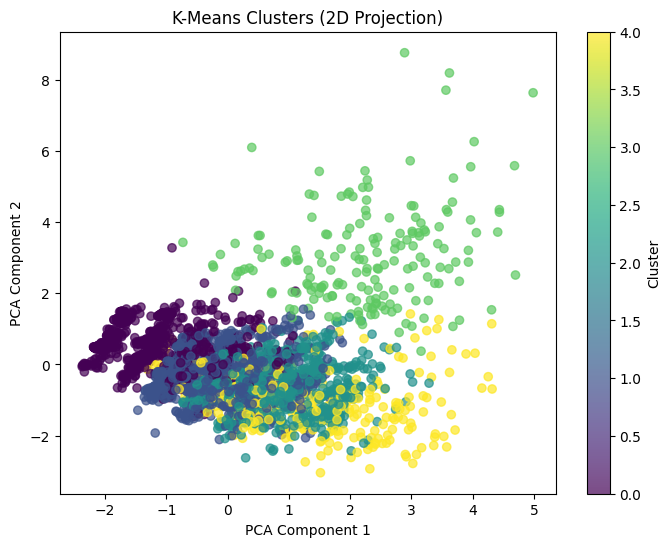

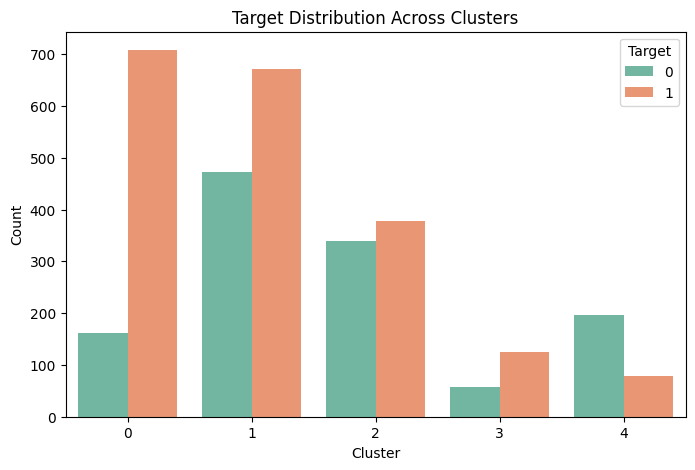


=== Cluster Summary (Mean Feature Values) ===
         Application mode  Displaced    Debtor  Tuition fees up to date  \
Cluster                                                                   
0               -0.383510   0.199935 -0.358167                 0.318442   
1               -0.278273   0.907512 -0.358167                 0.271070   
2                0.053926  -1.101914 -0.358167                 0.170519   
3                0.745170  -0.064079 -0.029304                 0.198656   
4                0.206649  -0.191848  2.791994                -0.928260   

           Gender  Scholarship holder  Age at enrollment  Avg_units_enrolled  \
Cluster                                                                        
0       -0.363036            1.739390          -0.483752            0.078851   
1       -0.154440           -0.574914          -0.443152           -0.010813   
2        0.135530           -0.558798          -0.119024           -0.054088   
3        0.034374          

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1],
            c=df_copy1['Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clusters (2D Projection)')
plt.colorbar(label='Cluster')
plt.show()

# Analyze clusters vs dropout status
plt.figure(figsize=(8,5))
sns.countplot(x='Cluster',hue='Target',data=df_copy1, palette='Set2')
plt.title('Target Distribution Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Target',loc='upper right')
plt.show()

# Summary statistics for clusters
cluster_summary = df_copy1.groupby('Cluster')[selected_cols+['Target']].mean()
print("\n=== Cluster Summary (Mean Feature Values) ===")
print(cluster_summary)

print("\n Clustering process completed successfully.")

# **Heirarchical Clustering**

 Hierarchical (Agglomerative) Clustering

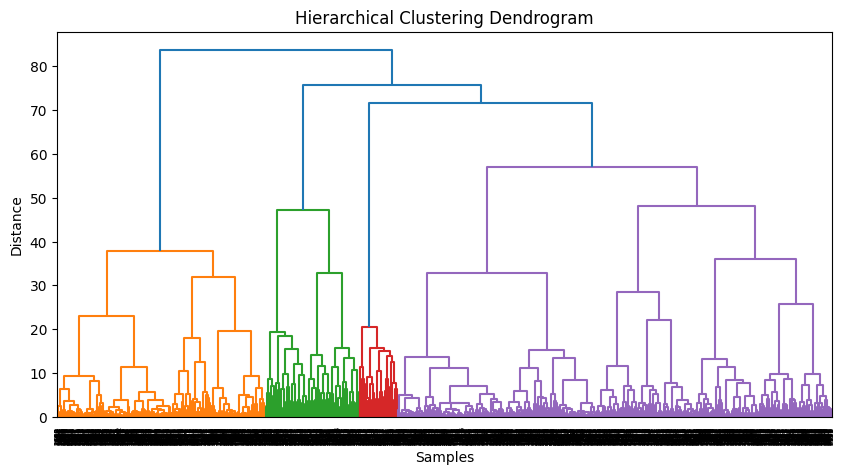

Clusters = 2, Silhouette Score = 0.168
Clusters = 3, Silhouette Score = 0.213
Clusters = 4, Silhouette Score = 0.243
Clusters = 5, Silhouette Score = 0.224


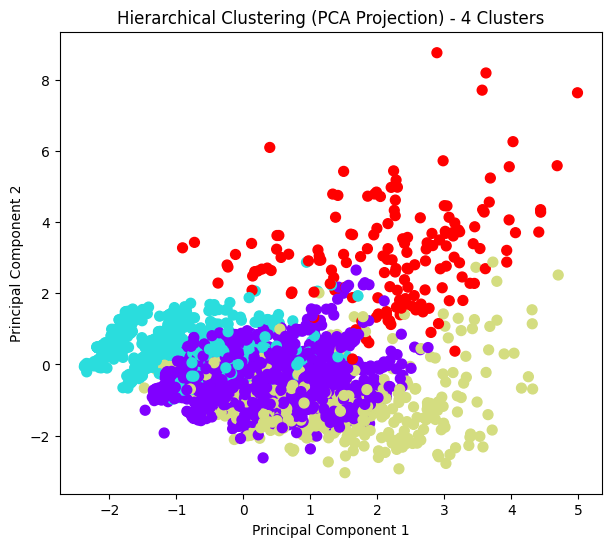

Explained variance by PCA: [0.22131855 0.17677531]


In [ ]:
# X_cluster = scaled and selected feature DataFrame
X_hier = X_cluster.copy()

#  Create and plot the dendrogram
# "ward" linkage minimizes variance within clusters
Z = linkage(X_hier, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()


# Try different numbers of clusters
for k in [2, 3, 4, 5]:
    model = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = model.fit_predict(X_hier)
    score = silhouette_score(X_hier, labels)
    print(f"Clusters = {k}, Silhouette Score = {score:.3f}")


# Fit the final model (choose best number of clusters)

best_k = 4   # change this based on best silhouette score
model = AgglomerativeClustering(n_clusters=best_k, linkage='ward')
labels = model.fit_predict(X_hier)


# Visualize clusters using PCA (2D view)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_hier)

plt.figure(figsize=(7, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='rainbow', s=50)
plt.title(f"Hierarchical Clustering (PCA Projection) - {best_k} Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

print("Explained variance by PCA:", pca.explained_variance_ratio_)


# **Regression **

Predict Final Academic Performance Score

In [ ]:
df_reg = df.copy()   # work on a copy

df_reg['Performance_Index'] = (
    0.6 * ((df_reg['Curricular units 1st sem (grade)'] + df_reg['Curricular units 2nd sem (grade)']) / 2)
    + 0.4 * ((df_reg['Curricular units 1st sem (approved)'] + df_reg['Curricular units 2nd sem (approved)']) / 2)
)

In [ ]:
selected_cols = [
    'Application mode', 'Displaced', 'Debtor', 'Tuition fees up to date',
    'Daytime/evening attendance',"Father's occupation","Mother's occupation",
    'Gender', 'Scholarship holder', 'Age at enrollment','Age at enrollment',
    'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)',
    'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)',
    'Unemployment rate'
]

Linear Regression

In [ ]:
X = df_reg[selected_cols]
y = df_reg['Performance_Index']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [ ]:
print("Linear Regression R2:", r2_score(y_test, y_pred_lr))

Linear Regression R2: 0.702834801657858


In [ ]:
print("Linear Regression RMSE:", sqrt(mean_squared_error(y_test, y_pred_lr)))

Linear Regression RMSE: 0.20401989846846766


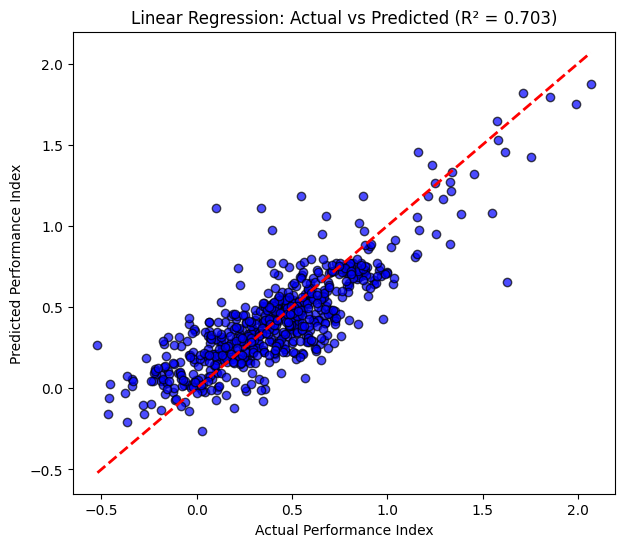

In [ ]:
plt.figure(figsize=(7,6))
plt.scatter(y_test, y_pred_lr, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title(f"Linear Regression: Actual vs Predicted (R² = {r2_score(y_test, y_pred_lr):.3f})")
plt.show()

Polynomial Regression

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
poly_reg_model = Pipeline([
    ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
    ("lin_reg", LinearRegression())
])

In [ ]:
poly_reg_model.fit(X_train, y_train)

# Predict
y_pred_poly = poly_reg_model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred_poly)
rmse = sqrt(mean_squared_error(y_test, y_pred_poly))

print(f"Polynomial Regression R²: {r2:.4f}")
print(f"Polynomial Regression RMSE: {rmse:.4f}")

Polynomial Regression R²: 0.7181
Polynomial Regression RMSE: 0.1987
